In [28]:
import tensorflow as tf 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from  tensorflow.keras import models, optimizers, regularizers

In [29]:
##Creación del modelo convolucional

In [30]:
#32filtros, kernelsize 3,3, activacion de tipo relu imput shape de 3 canales, convolucion de 64 filtros y de 3,3 en el kernel, modelo de una sola dimension con dense capa de dropout de 0.5 t capa densa de 512 
#clasificacion binaria es sigmoid es gato o es perro
model = models.Sequential()

model.add(Conv2D(32, (3,3), activation= 'relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

Data augmentation

In [31]:
#escalar nuestros datos y dividirlos en el numero maximo de pixeles que es 255

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

In [32]:
##Reescalar los datos

In [33]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [34]:
#tamaño de la imagen 150x150
train_generator = train_datagen.flow_from_directory('/kaggle/input/cnn-data-sources/cats_and_dogs/train',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary'
                                 )

validation_generator = test_datagen.flow_from_directory('/kaggle/input/cnn-data-sources/cats_and_dogs/validation',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary'
                                 )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [35]:
##Callbacks que  guarde siempre el mejor

In [36]:
checkpoint = ModelCheckpoint('modelo_perros_gatos.hdf5',monitor='val_accuracy', verbose= 1, save_best_only=True)

In [37]:
##Compilando el modelo

In [38]:
model.compile(loss='binary_crossentropy', optimizer =optimizers.Adam(),
             metrics=['accuracy'])

In [39]:
##Entrenando el modelo

In [40]:
hist = model.fit(train_generator, steps_per_epoch=2000//32,
                epochs=100,
                validation_data=validation_generator,
                 validation_steps= 1000//32,
                 callbacks=[checkpoint])

Epoch 1/100
62/62 [==============================] - ETA: 0s - loss: 0.6948 - accuracy: 0.5051
Epoch 1: val_accuracy improved from -inf to 0.53125, saving model to modelo_perros_gatos.hdf5
62/62 [==============================] - 25s 366ms/step - loss: 0.6948 - accuracy: 0.5051 - val_loss: 0.6877 - val_accuracy: 0.5312
Epoch 2/100
62/62 [==============================] - ETA: 0s - loss: 0.6879 - accuracy: 0.5518
Epoch 2: val_accuracy improved from 0.53125 to 0.57964, saving model to modelo_perros_gatos.hdf5
62/62 [==============================] - 20s 329ms/step - loss: 0.6879 - accuracy: 0.5518 - val_loss: 0.6872 - val_accuracy: 0.5796
Epoch 3/100
62/62 [==============================] - ETA: 0s - loss: 0.6774 - accuracy: 0.5503
Epoch 3: val_accuracy did not improve from 0.57964
62/62 [==============================] - 22s 352ms/step - loss: 0.6774 - accuracy: 0.5503 - val_loss: 0.6720 - val_accuracy: 0.5655
Epoch 4/100
62/62 [==============================] - ETA: 0s - loss: 0.6893 -

In [ ]:
##Resultados

In [42]:
import matplotlib.pyplot as plt

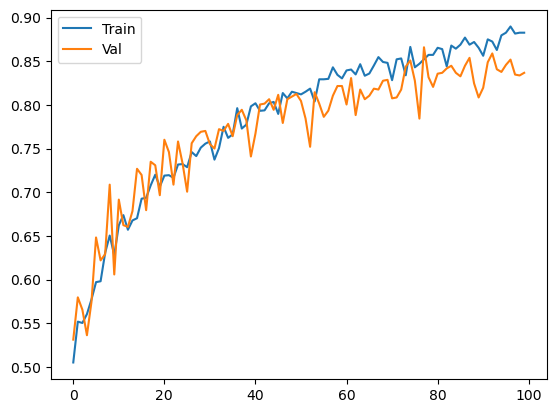

In [43]:
plt.plot(hist.history['accuracy'], label = 'Train')
plt.plot(hist.history['val_accuracy'], label = 'Val')
plt.legend()
plt.show()

In [44]:
test_generator = test_datagen.flow_from_directory('/kaggle/input/cnn-data-sources/cats_and_dogs/test',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary'
                                 )

Found 1000 images belonging to 2 classes.


In [45]:
model2 = model 

In [47]:
model2.load_weights('./modelo_perros_gatos.hdf5')

In [48]:
model2.evaluate(test_generator)

32/32 [==============================] - 4s 133ms/step - loss: 0.3898 - accuracy: 0.8330


[0.38980868458747864, 0.8330000042915344]